In [4]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('Symptom2Disease.csv')

# 通过疾病名称进行分组
grouped = df.groupby('disease')

# 初始化一个新的DataFrame来存储结果
result_df = pd.DataFrame()

# 遍历每个疾病的描述
for disease_name, group in grouped:
    # 将每个疾病的描述连接成一个字符串，以逗号分隔
    descriptions = ', '.join(group['description'])
    
    # 将描述字符串分割成列表
    description_list = descriptions.split(', ')
    
    # 创建新的列名，如description1, description2, ...
    new_columns = [f'description{i+1}' for i in range(len(description_list))]
    
    # 创建一个字典，其中键是新列名，值是描述列表中的对应描述
    row_data = {column: description for column, description in zip(new_columns, description_list)}
    
    # 将字典转换为DataFrame，并将其添加到结果DataFrame中
    temp_df = pd.DataFrame([row_data])
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

# 将结果保存为新的CSV文件
result_df.to_csv('result.csv', index=False)


In [1]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('Symptom2Disease.csv')

# 通过groupby将疾病描述分组，并使用cumcount创建描述列的新名称
df['description_num'] = df.groupby('disease').cumcount() + 1

# 透视表，将每个疾病的不同描述作为列，并使用pivot
pivot_df = df.pivot(index='disease', columns='description_num', values='description')

# 重命名列，将列名称改为description1，description2...
pivot_df.columns = [f'description{col}' for col in pivot_df.columns]

# 将结果保存为Excel文件
pivot_df.reset_index().to_excel('output.xlsx', index=False)

In [3]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('traning.csv')

# 创建一个新列，用于存储症状描述
df['symptoms_description'] = ''

# 遍历每一行，将症状整合为一句话
for index, row in df.iterrows():
    symptoms = [col.replace('_', ' ') for col in df.columns[1:] if row[col] == 'yes']
    symptoms_description = ', '.join(symptoms)
    df.at[index, 'symptoms_description'] = f'I have {symptoms_description}'

# 删除原始的症状列
df = df.drop(columns=df.columns[1:-1])

# 保存结果到一个新的CSV文件
df.to_csv('output.csv', index=False)


In [4]:
import pandas as pd

# 读取已处理的CSV文件
df = pd.read_csv('output.csv')

# 通过groupby将疾病分组，并使用cumcount创建描述列的新名称
df['description_num'] = df.groupby('prognosis').cumcount() + 1

# 透视表，将每个疾病的不同描述作为列，并使用pivot
pivot_df = df.pivot(index='prognosis', columns='description_num', values='symptoms_description')

# 重命名列，将列名称改为description1，description2...
pivot_df.columns = [f'description{col}' for col in pivot_df.columns]

# 重置索引
pivot_df.reset_index(inplace=True)

# 将结果保存为CSV文件或Excel文件
pivot_df.to_csv('output_descriptions.csv', index=False)
# pivot_df.to_excel('output_descriptions.xlsx', index=False)


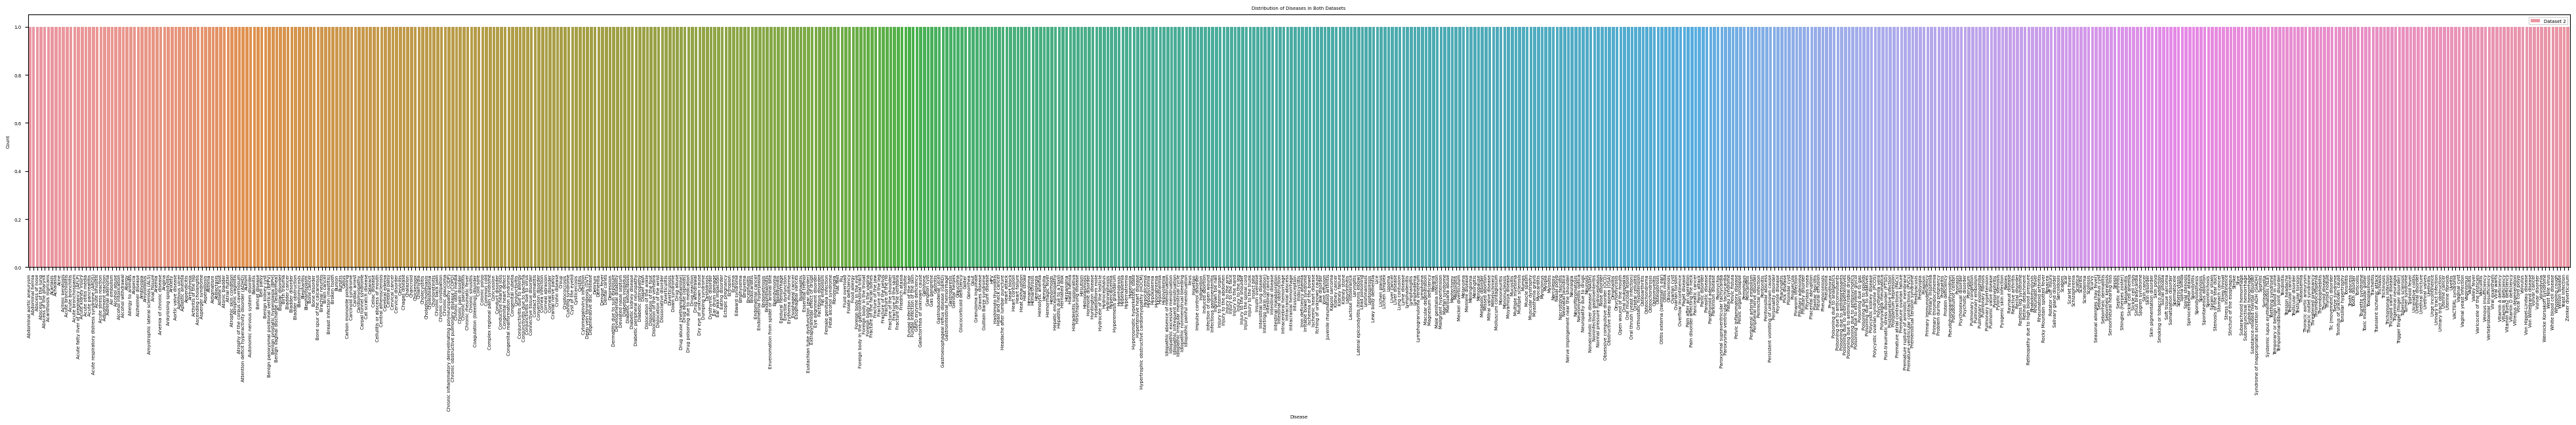

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取两个数据集
df1 = pd.read_csv('disease_1.csv')
df2 = pd.read_csv('disease_2.csv')

# 示例1：绘制疾病分布柱状图
plt.figure(figsize=(50, 5))
fontsize = 5

sns.countplot(data=df2, x='disease', label='Dataset 2')
plt.xticks(rotation=90, fontsize=fontsize)  # 调整x轴标签的字体大小
plt.xlabel('Disease', fontsize=fontsize)  # 调整x轴标签的字体大小
plt.ylabel('Count', fontsize=fontsize)  # 调整y轴标签的字体大小
plt.title('Distribution of Diseases in Both Datasets', fontsize=fontsize)  # 调整标题的字体大小
plt.legend(fontsize=fontsize)  # 调整图例的字体大小
plt.tick_params(axis='y', labelsize=fontsize)  # 调整y轴刻度的字体大小
plt.show()


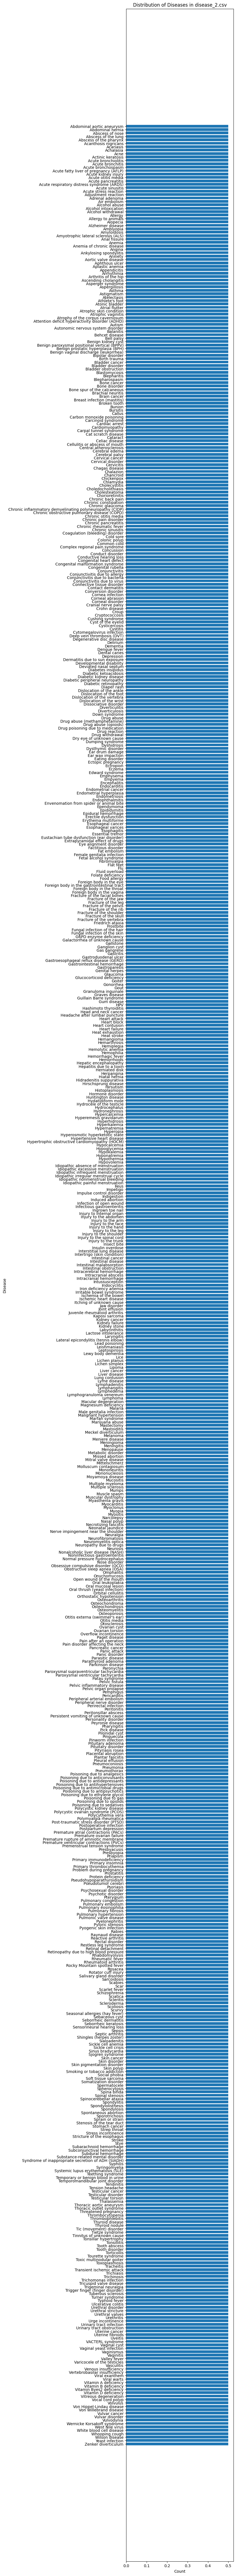

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 disease_2.csv 数据集
df2 = pd.read_csv('disease_2.csv')

# 提取疾病名称列
disease_names = df2['disease']

# 绘制竖直排列的柱状图
plt.figure(figsize=(5, 120))
plt.barh(disease_names, width=0.5)  # 设置柱状图的宽度为0.5
plt.xlabel('Count')
plt.ylabel('Disease')
plt.title('Distribution of Diseases in disease_2.csv')
plt.gca().invert_yaxis()  # 反转y轴，使得疾病名称从上到下排列
plt.show()


In [22]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('disease_2.csv')  # 请将 'your_file.csv' 替换为你的CSV文件路径

# 假设你要统计的列名为 'label'，使用 value_counts() 计算每个标签的数量
label_counts = df['disease'].value_counts()

# 打印标签数量统计结果
print(label_counts)


disease
Abdominal aortic aneurysm      1
Pelvic inflammatory disease    1
Parasitic disease              1
Parathyroid adenoma            1
Parkinson disease              1
                              ..
Fracture of the pelvis         1
Fracture of the rib            1
Fracture of the shoulder       1
Fracture of the skull          1
Zenker diverticulum            1
Name: count, Length: 679, dtype: int64


In [2]:
import pandas as pd
import json

# 读取两个数据集
disease_1_data = pd.read_csv('disease_1.csv')
disease_2_data = pd.read_csv('disease_2.csv')

# 创建一个空的JSON列表
json_data = []

# 遍历disease_1数据集，生成JSON格式的数据
for index, row in disease_1_data.iterrows():
    for i in range(1, 51):  # 假设有50个描述字段
        json_entry = {
            "text": "### Human: " + row[f"description{i}"] + " ### Assistant: " + row["disease"]
        }
        json_data.append(json_entry)

# 遍历disease_2数据集，生成JSON格式的数据
for index, row in disease_2_data.iterrows():
    for i in range(1, 11):  # 假设有10个描述字段
        json_entry = {
            "text": "### Human: " + row[f"description{i}"] + " ### Assistant: " + row["disease"]
        }
        json_data.append(json_entry)

# 将生成的JSON数据写入文件
with open('output.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print("JSON文件已生成。")


JSON文件已生成。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("log.csv")

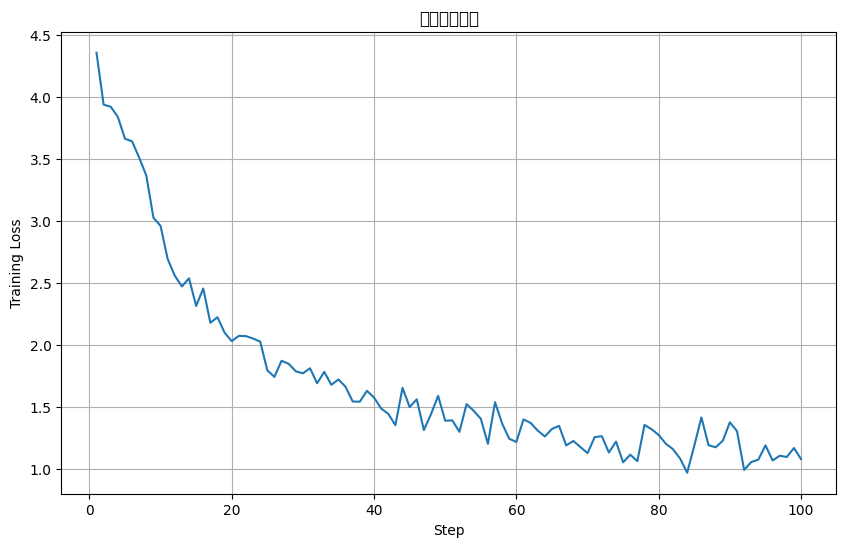

In [4]:
# 提取步骤和训练损失
steps = df['Step']
loss = df['Training Loss']

# 绘制曲线图
plt.figure(figsize=(10, 6))  # 设置图形大小
# 绘制曲线图，不使用线连接数据点
plt.plot(steps, loss, linestyle='-')  # 不显示数据点，只绘制曲线

plt.title('训练损失曲线')  # 设置图形标题
plt.xlabel('Step')  # 设置横坐标标签
plt.ylabel('Training Loss')  # 设置纵坐标标签
plt.grid(True)  # 添加网格线
plt.show()  # 显示图形
